In [26]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import (
    silhouette_score, silhouette_samples
)

import pandas as pd
import seaborn as sns

In [27]:
import pickle as pkl

with open("df_clean.pkl", "rb") as f:
    df_clean = pkl.load(f)
    
df_clean.head(5)

,Area,Excentricidad,Solidez,Redondez,FactorForma3,FactorForma4,MétodoSecado_Honey,MétodoSecado_Lavado,MétodoSecado_Natural,RelacionAspecto_Alargado,RelacionAspecto_Redondeado
0,0.129874,0.766774,0.792634,0.517365,0.155979,0.915241,0.0,1.0,0.0,1.0,0.0
1,0.180806,0.766774,0.683075,0.585128,0.108797,0.710502,0.0,0.0,1.0,1.0,0.0
2,0.168854,0.927020,0.805331,0.544120,0.157319,0.836267,0.0,0.0,1.0,1.0,0.0
3,0.147804,0.943714,0.913815,0.662102,0.126179,0.935583,0.0,1.0,0.0,1.0,0.0
4,0.080719,0.673493,0.895822,0.834715,0.555310,0.959610,0.0,1.0,0.0,1.0,0.0


In [28]:
df_clean.columns

Index(['Area', 'Excentricidad', 'Solidez', 'Redondez', 'FactorForma3',
       'FactorForma4', 'MétodoSecado_Honey', 'MétodoSecado_Lavado',
       'MétodoSecado_Natural', 'RelacionAspecto_Alargado',
       'RelacionAspecto_Redondeado'],
      dtype='object')

# Affinity Propagation Clustering

El Affinity Propagation es un algoritmo de clustering que identifica "*exemplars*" entre los datos y forma clusters alrededor de estos exemplars. Similar al DBSCAN, no requiere que se especifique el número de clusters de antemano, y sus hiperparámetros son el *damping factor*, la preferencia y el cálculo de la similitud entre puntos que se puede realizar con diferentes métricas de distancia como la distancia euclidiana o la distancia del coseno.

Este método se basa en la transmisión de mensajes entre puntos de datos para determinar los *exemplars* y los clusters. Los puntos de datos eligen dinámicamente sus ejemplares, los cuales son puntos prototípicos alrededor de los cuales se forman los clusters. 

**Intercambio de Mensajes:**

Cada punto de datos puede potencialmente ser elegido como *exemplar* (representante o centro de un clúster). Para decidirlo, los puntos intercambian dos tipos de mensajes numéricos entre sí:

* Responsabilidad (r(i, k)): Indica "qué tan apropiado es que k represente a i". Se calcula considerando la similaridad entre i y k, corregida con respecto a qué otros candidatos k′ podrían explicar mejor a i.

* Disponibilidad (a(i, k)): Indica "qué tan adecuado es que k acepte representar a i". Se actualiza en función de las responsabilidades que otros puntos envían a k (es decir, cuántos más quieren que k sea su ejemplar).

**Procedimiento general:**
* Inicialmente todas las disponibilidades empiezan en cero. 
* Se alternan las actualizaciones de responsabilidades y disponibilidades basándose en cálculos matemáticos.
* Estas actualizaciones se repiten hasta alcanzar convergencia (o hasta un número máximo de iteraciones).

**Hiperparámetros principales:**

* **damping:** un valor en el rango [0.5, 1) que ayuda a estabilizar las actualizaciones de mensajes y evitar oscilaciones numéricas. Un valor más alto significa que las actualizaciones son más suaves y menos propensas a cambios bruscos.]

* **preference:** un valor que influye en la probabilidad de que un punto sea elegido como *exemplar*. Valores más altos tienden a producir más clusters, mientras que valores más bajos tienden a producir menos clusters. Si no se especifica, se suele usar la mediana o el valor mínimo de las similitudes entre puntos.

In [29]:
ag_model = AgglomerativeClustering()

ag_model = ag_model.fit(df_clean)

In [30]:
with open("ag_model.pkl", "wb") as f:
    pkl.dump(ag_model, f)

<Axes: xlabel='None'>

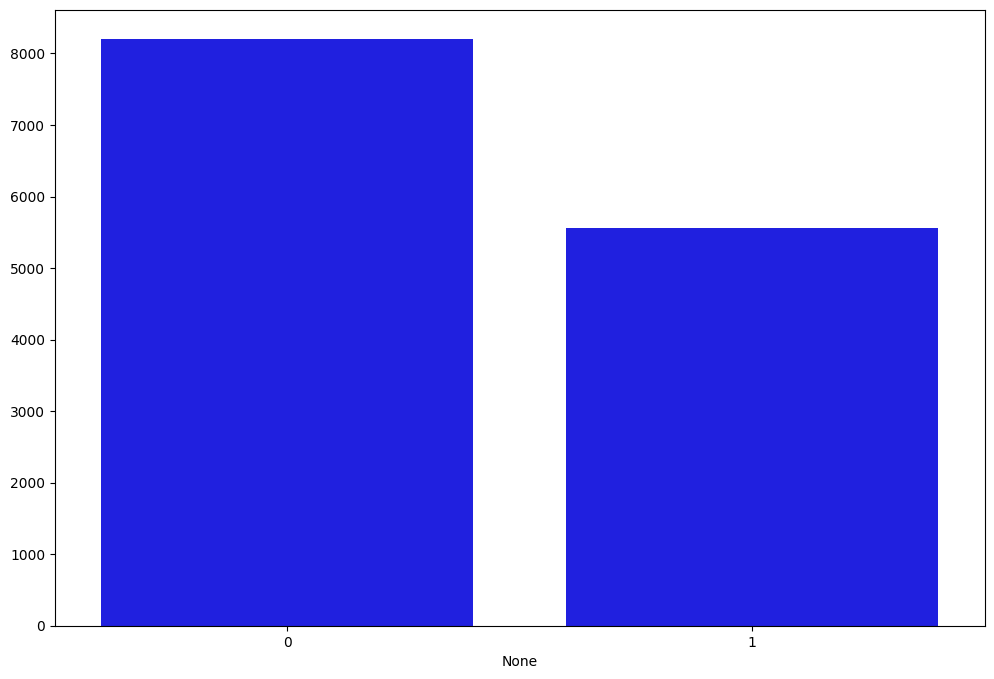

In [31]:
ag_cluster_labels = pd.Series(ag_model.labels_)
ag_clusters = ag_cluster_labels.value_counts()
fig = plt.figure(figsize=(12,8))
sns.barplot(x=ag_clusters.index, y=ag_clusters.values, color='b')

<Axes: xlabel='None'>

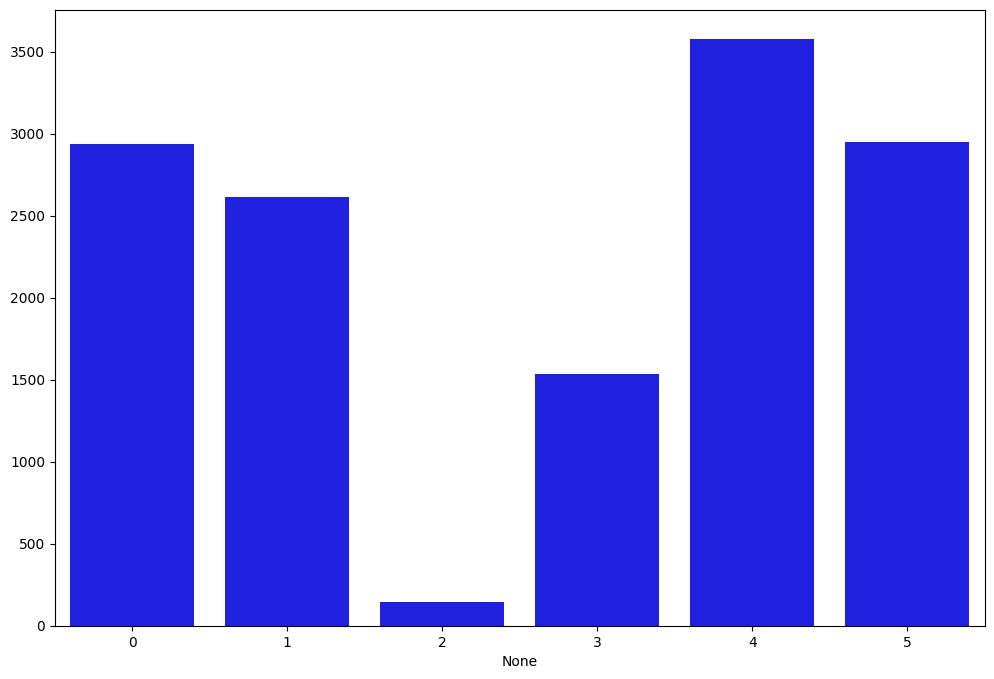

In [40]:
ag_model = AgglomerativeClustering(distance_threshold=15, n_clusters=None)

ag_model = ag_model.fit(df_clean)

ag_cluster_labels = pd.Series(ag_model.labels_)
ag_clusters = ag_cluster_labels.value_counts()
fig = plt.figure(figsize=(12,8))
sns.barplot(x=ag_clusters.index, y=ag_clusters.values, color='b')